<a href="https://colab.research.google.com/github/SwapnasumaM/HousePricesUS/blob/main/HousePricesPredictionUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the datasets and merging them

In [22]:
import pandas as pd

# 1. Load all datasets
unemployment = pd.read_csv('Unemployment rate.csv', parse_dates=['DATE'])
income = pd.read_csv('Income.csv', parse_dates=['DATE'])
house_starts = pd.read_csv('House starts.csv', parse_dates=['DATE'])
consumer_confidence = pd.read_csv('Consumer Confidence Index.csv', parse_dates=['DATE'])
house_prices = pd.read_csv('House Prices.csv', parse_dates=['DATE'])

datasets = [unemployment, income, house_starts, consumer_confidence, house_prices]
datasets_names = ['unemployment', 'income', 'house_starts', 'consumer_confidence', 'house_prices']

# 2. Check for Duplicates in Original Data
for df, name in zip(datasets, datasets_names):
    print(name, df['DATE'].duplicated().sum())

# 3. Format Date
for df in datasets:
    df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)
    df['DATE'] = df['DATE'].apply(lambda x: x.replace(day=1))

# 4. Merge Data Step by Step
merged_data = unemployment.copy()

merged_data = merged_data.merge(income, on='DATE', how='outer')
print("After merging income:", merged_data['DATE'].duplicated().sum())

merged_data = merged_data.merge(house_starts, on='DATE', how='outer')
print("After merging house starts:", merged_data['DATE'].duplicated().sum())

merged_data = merged_data.merge(consumer_confidence, on='DATE', how='outer')
print("After merging consumer confidence:", merged_data['DATE'].duplicated().sum())

merged_data = merged_data.merge(house_prices, on='DATE', how='outer')
print("After merging house prices:", merged_data['DATE'].duplicated().sum())

# 5. Filter Data
start_date = pd.to_datetime("01-01-2000", dayfirst=True)
end_date = pd.to_datetime("31-12-2023", dayfirst=True)

merged_data = merged_data[(merged_data['DATE'] >= start_date) & (merged_data['DATE'] <= end_date)]
merged_data.sort_values(by='DATE', inplace=True)

# 6. Save to CSV
merged_data.to_csv('House_Prices_Prediction.csv', index=False)


unemployment 0
income 0
house_starts 0
consumer_confidence 0
house_prices 0
After merging income: 0
After merging house starts: 0
After merging consumer confidence: 0
After merging house prices: 0


In [23]:
from google.colab import files

# Download the file
files.download('House_Prices_Prediction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Building a Data Science Model for House prices Prediction for the past 20 years in US

Importing the necessary libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Loading the dataset

In [35]:
data = pd.read_csv("/content/House_Prices_Prediction .csv")


In [41]:
print(data.head())


         DATE  UNRATE       INCOME   HOUST  UMCSENT  CSUSHPISA
0  2000-01-01     4.0  5520.666667  1636.0    112.0    100.551
1  2000-02-01     4.1  5520.666667  1737.0    111.3    101.339
2  2000-03-01     4.0  5520.666667  1604.0    107.1    102.126
3  2000-04-01     3.8  5520.666667  1626.0    109.2    102.922
4  2000-05-01     4.0  5520.666667  1575.0    110.7    103.677


In [42]:
data.isnull().sum()


DATE          0
UNRATE        1
INCOME       19
HOUST         1
UMCSENT       0
CSUSHPISA     1
dtype: int64

In [46]:
data.interpolate(method='linear', inplace=True)


In [47]:
data.isnull().sum()

DATE         0
UNRATE       0
INCOME       0
HOUST        0
UMCSENT      0
CSUSHPISA    0
dtype: int64

In [49]:
print(data.dtypes)


DATE          object
UNRATE       float64
INCOME       float64
HOUST        float64
UMCSENT      float64
CSUSHPISA    float64
dtype: object


In [51]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')


In [52]:
data['DATE'] = pd.to_datetime(data['DATE'])


In [54]:
print(data.dtypes)


DATE         datetime64[ns]
UNRATE              float64
INCOME              float64
HOUST               float64
UMCSENT             float64
CSUSHPISA           float64
dtype: object


In [53]:
print(data.head())

        DATE  UNRATE       INCOME   HOUST  UMCSENT  CSUSHPISA
0 2000-01-01     4.0  5520.666667  1636.0    112.0    100.551
1 2000-02-01     4.1  5520.666667  1737.0    111.3    101.339
2 2000-03-01     4.0  5520.666667  1604.0    107.1    102.126
3 2000-04-01     3.8  5520.666667  1626.0    109.2    102.922
4 2000-05-01     4.0  5520.666667  1575.0    110.7    103.677


In [60]:
data.rename(columns={
    'CSUSHPISA': 'HousePrices'
}, inplace=True)

In [61]:
print(data.head())

        DATE  UNRATE       INCOME   HOUST  UMCSENT  HousePrices
0 2000-01-01     4.0  5520.666667  1636.0    112.0      100.551
1 2000-02-01     4.1  5520.666667  1737.0    111.3      101.339
2 2000-03-01     4.0  5520.666667  1604.0    107.1      102.126
3 2000-04-01     3.8  5520.666667  1626.0    109.2      102.922
4 2000-05-01     4.0  5520.666667  1575.0    110.7      103.677


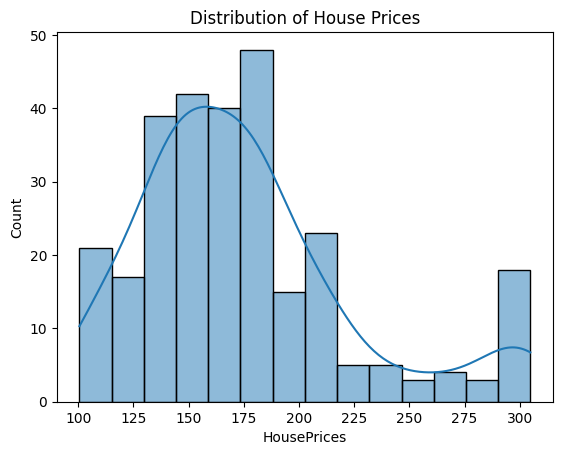

In [63]:
sns.histplot(data['HousePrices'], kde=True)
plt.title('Distribution of House Prices')
plt.show()


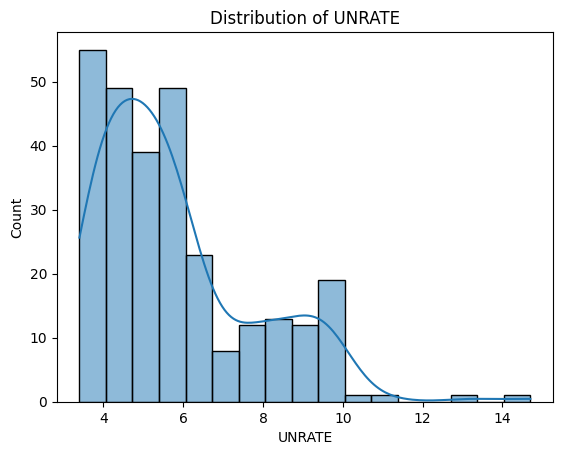

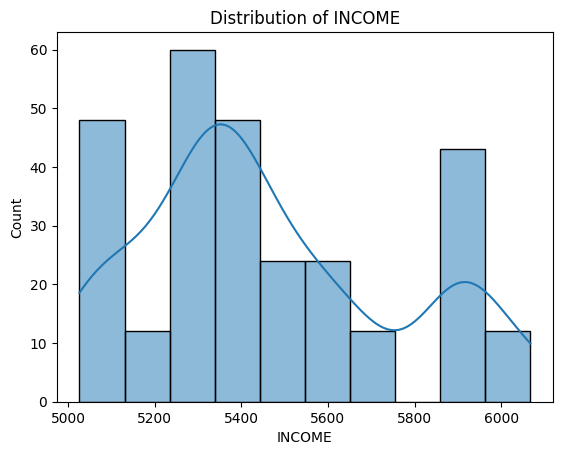

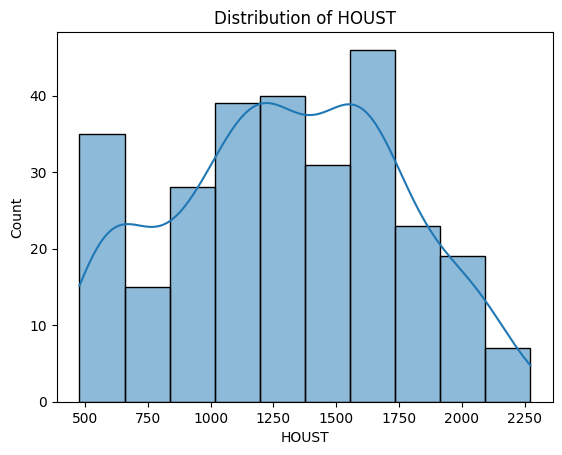

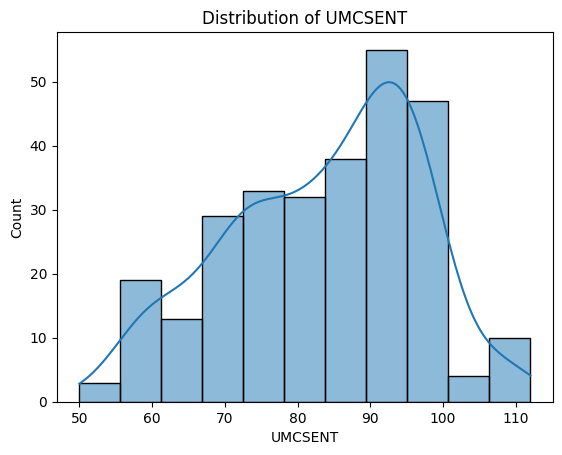

In [65]:
# Distribution of other numerical variables
num_vars = ['UNRATE', 'INCOME', 'HOUST', 'UMCSENT']

for var in num_vars:
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

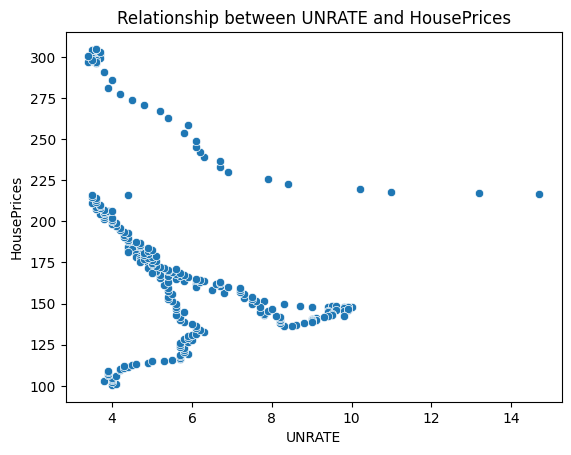

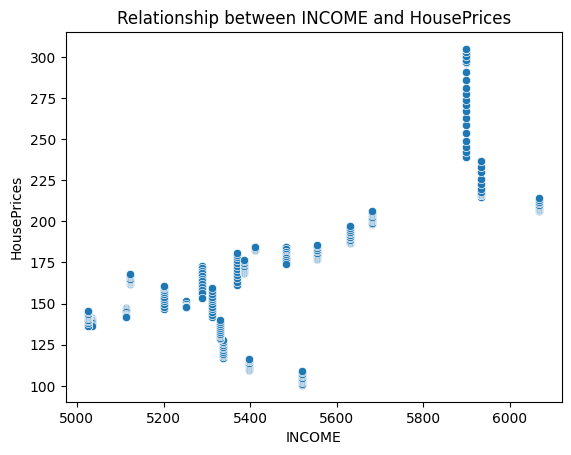

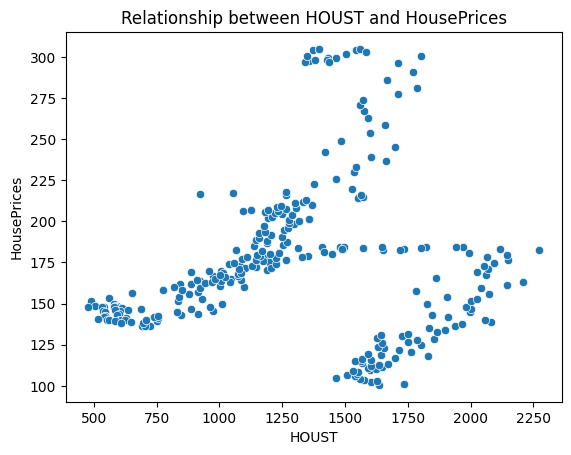

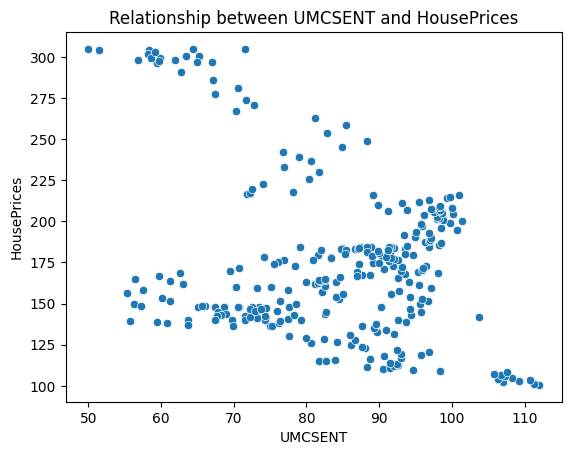

In [68]:
for var in num_vars:
    sns.scatterplot(x=data[var], y=data['HousePrices'])
    plt.title(f'Relationship between {var} and HousePrices')
    plt.show()


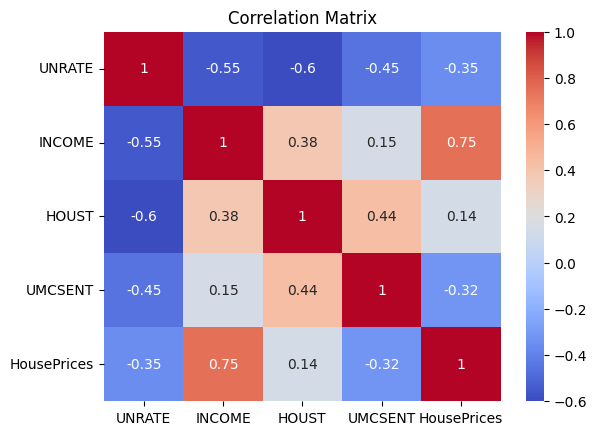

In [69]:
correlation_matrix = data[num_vars + ['HousePrices']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


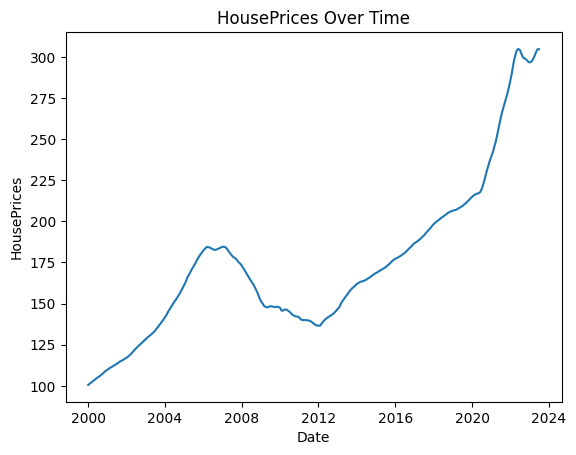

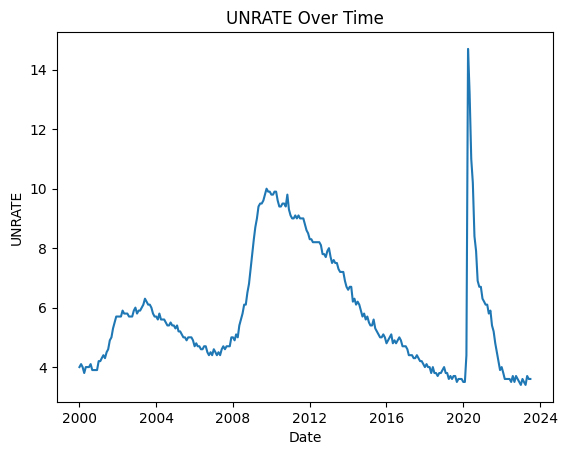

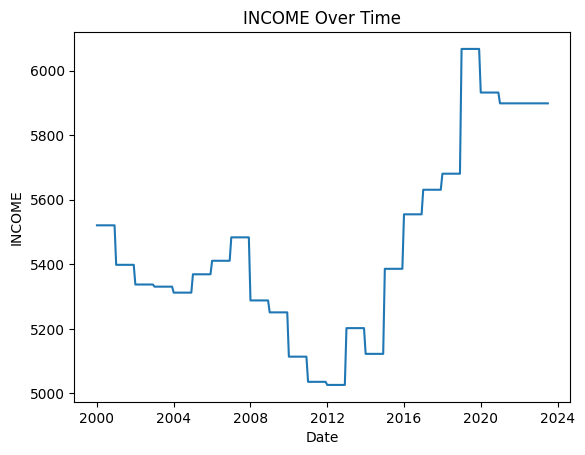

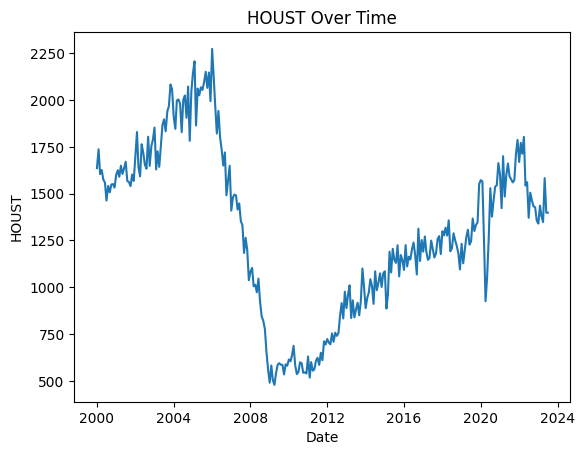

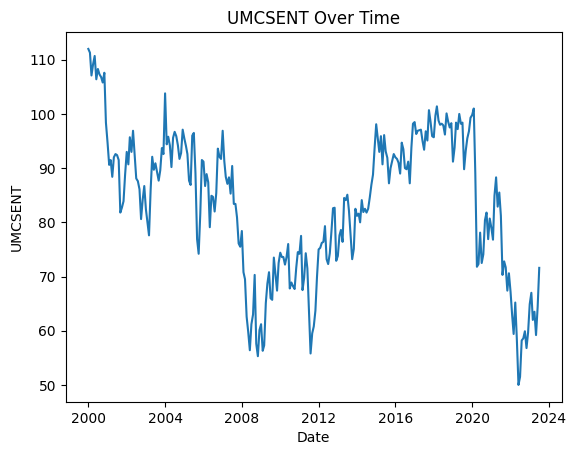

In [70]:
plt.plot(data['DATE'], data['HousePrices'])
plt.title('HousePrices Over Time')
plt.xlabel('Date')
plt.ylabel('HousePrices')
plt.show()

for var in num_vars:
    plt.plot(data['DATE'], data[var])
    plt.title(f'{var} Over Time')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.show()


In [71]:
data.drop('DATE', axis=1, inplace=True)


In [72]:
X = data.drop('HousePrices', axis=1)
y = data['HousePrices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")






R-squared: 0.8215191673289369
Mean Absolute Error (MAE): 16.68863131625269
Root Mean Squared Error (RMSE): 21.000530139019574


Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 45.64780055048445


XGBoost Model

In [74]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

bst = xgb.train(params, dtrain)

xgb_predictions = bst.predict(dtest)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MSE: {xgb_mse}")


XGBoost MSE: 109.50773563361108


R-squared

In [76]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, rf_predictions)
r2_xgb = r2_score(y_test, xgb_predictions)

print(f"Random Forest R-squared: {r2_rf}")
print(f"XGBoost R-squared: {r2_xgb}")


Random Forest R-squared: 0.9815264260384562
XGBoost R-squared: 0.9556824375064609


# **REPORT**

House Prices Prediction Analysis Report

Introduction
In this report, we aim to examine the correlation between several macroeconomic indicators and house prices over the past two decades (2000-2023) in the US. Our analysis involves understanding data distribution, the relationship between variables, and using various regression techniques to predict house prices.

Data Collection and Preprocessing
1. Data Importing and Merging
Five datasets were imported:

Unemployment rate (unemployment)
Income (income)
House starts (house_starts)
Consumer Confidence Index (consumer_confidence)
House Prices (house_prices)
The data was merged sequentially on the 'DATE' column, ensuring there were no duplicates.

2. Data Cleaning
A preliminary check revealed missing values in the data. The missing values were linearly interpolated to fill the gaps. Subsequently, the 'DATE' column, initially an object type, was converted to a datetime type.

3. Data Renaming
To enhance clarity, 'CSUSHPISA' was renamed to 'HousePrices'.

Exploratory Data Analysis (EDA)
1. Distribution Analysis
Histograms were plotted for house prices and other numerical variables ('UNRATE', 'INCOME', 'HOUST', 'UMCSENT'). This allowed us to examine the distribution and skewness of each variable.

2. Relationship Analysis
Scatter plots between house prices and other numerical variables showcased their relationship, revealing whether there was a potential linear relationship suitable for linear regression.

3. Correlation Analysis
A heatmap of the correlation matrix illustrated the strength and direction of relationships between variables. This is crucial for linear regression as multicollinearity (high correlation between independent variables) can distort the results.

4. Time Series Analysis
Line plots against 'DATE' showcased the trends of house prices and other variables over the past 23 years.

Model Building
1. Data Splitting
The 'DATE' column was dropped since it's not a feature for prediction. The data was then split into training and testing datasets (80% training and 20% testing).

2. Linear Regression Model
A linear regression model was constructed to predict house prices. On evaluation, the model produced an R-squared value of 0.82, meaning it explains 82% of the variability in the data. It also gave a mean absolute error (MAE) of 16.69 and a root mean squared error (RMSE) of 21.00.

3. Random Forest Regressor
The Random Forest model was implemented to check if a non-linear model would fit the data better. The mean squared error (MSE) was found to be 45.65, and the R-squared value was 0.98.

4. XGBoost Regressor
XGBoost, a gradient boosting algorithm, was also employed. The model's mean squared error was 109.51, with an R-squared value of 0.95.

Conclusion
From the exploratory data analysis, it was evident that there are relationships between macroeconomic indicators and house prices. Among the models used, Random Forest had the highest R-squared value of 0.98, making it the most effective at explaining the variability in house prices among the models tested.

While these models provide a foundation for understanding the relationships and making predictions, further refinements, including feature engineering and hyperparameter tuning, may enhance the prediction accuracy.




